In [23]:
import pandas as pd                                                        # for data manipulation
import numpy as np                                                         # for numerical operations
from matplotlib import pyplot as plt                                       # for visualization
import seaborn as sns                                                      # for visualization
from sklearn.model_selection import train_test_split                       # for splitting the data into train and test sets
from sklearn.preprocessing import StandardScaler                           # for standardizing the data
from imblearn.over_sampling import SMOTE                                   # for handling class imbalance
from sklearn.linear_model import LogisticRegression                        # for Logistic Regression model
from sklearn.tree import DecisionTreeClassifier                            # for Decision Tree model
from sklearn.ensemble import RandomForestClassifier                        # for Random Forest model
from sklearn.svm import SVC                                                # for Support Vector Machine model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # for evaluating the models
from lightgbm import LGBMClassifier                                        # for LightGBM model
from sklearn.neighbors import KNeighborsClassifier                         # for K-Nearest Neighbors model
from sklearn.naive_bayes import GaussianNB                                 # for Gaussian Naive Bayes model
import pickle

In [24]:
# Load dataset
file_path = '/content/diabetes.xlsx'  # Update the path if necessary
data = pd.read_excel(file_path)
# Exploratory Data Analysis
print(data.head())
print(data.describe())
print(data.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

**Data Overview:**
The dataset comprises 768 entries with 9 columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome. Each column represents a specific health metric relevant to diabetes diagnosis. The first five rows of the dataset reveal diverse values across these metrics, providing a snapshot of the range of data.

**Descriptive Statistics**
The descriptive statistics table offers insights into the distribution of each feature.

The mean age is approximately 33 years, with a standard deviation of around 12 years, indicating a relatively young cohort.
Glucose levels average about 121 mg/dL, with a standard deviation of 32 mg/dL, showing significant variability.
BMI averages around 32, with notable variation (standard deviation of 7.88), highlighting differences in body mass among individuals.
Several features, such as SkinThickness and Insulin, have minimum values of 0, suggesting possible missing or zero-filled values which might need further investigation.


**Data Structure and Types:**
The dataset's structure is straightforward, with all columns containing non-null values. Seven columns are integers (int64), while two (BMI and DiabetesPedigreeFunction) are floats (float64). The Outcome column is binary, indicating the presence (1) or absence (0) of diabetes. The uniformity in data types and absence of null values simplify preprocessing, although the presence of zeros in some health metrics could warrant special handling to ensure accurate analysis and modeling

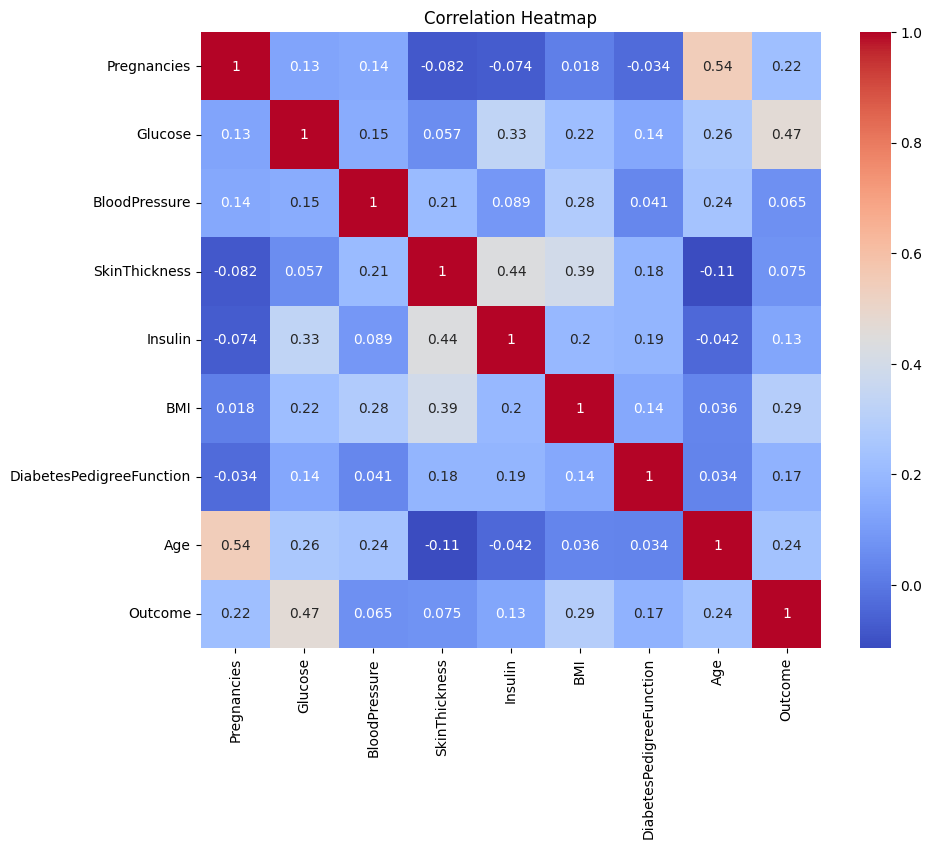

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation Heatmap Analysis
The correlation heatmap provides a visual representation of the relationships between different features in the Pima Indians Diabetes dataset. Each cell in the matrix represents the correlation coefficient between the respective row and column features, with values ranging from -1 to 1. A coefficient close to 1 indicates a strong positive correlation, whereas a value close to -1 indicates a strong negative correlation. A value near 0 suggests little to no correlation.

Key Observations:
Pregnancies and Age: There is a strong positive correlation (0.54) between the number of pregnancies and age. This suggests that older individuals in the dataset tend to have more pregnancies, which is a logical demographic trend.

Glucose and Outcome: The correlation between glucose levels and the diabetes outcome is 0.47, indicating a moderately strong positive correlation. Higher glucose levels are associated with an increased likelihood of diabetes.

BMI and Outcome: BMI shows a positive correlation of 0.29 with the diabetes outcome, suggesting that higher BMI is associated with a higher risk of diabetes.

Age and Outcome: Age has a positive correlation of 0.24 with the outcome, indicating that older individuals have a higher probability of having diabetes.

Other Feature Correlations:

Glucose and Insulin: There is a moderate positive correlation (0.33) between glucose and insulin levels, suggesting that higher glucose levels tend to be accompanied by higher insulin levels.
SkinThickness and Insulin: The correlation of 0.44 between skin thickness and insulin indicates a moderate positive relationship.
BloodPressure and BMI: A positive correlation (0.28) between blood pressure and BMI suggests that higher BMI is associated with higher blood pressure.
Weak Correlations: Features such as Blood Pressure, Skin Thickness, and Diabetes Pedigree Function have weak correlations with the outcome, indicating they may have less direct influence on the prediction of diabetes.

Negative Correlations: Some negative correlations are present, such as between Skin Thickness and Age (-0.11), but these are relatively weak and do not indicate strong inverse relationships.

Implications:
These correlations are critical for feature selection in machine learning models. Features with higher correlations to the outcome, like glucose and BMI, are likely to be more informative for predicting diabetes. Conversely, features with low or negative correlations may contribute less to model accuracy and could be considered for exclusion during feature engineering. Understanding these relationships helps in constructing more accurate and efficient predictive models.

**Identify the number of diabetic and non-diabetic patients in the Outcome variable**

Outcome
0    500
1    268
Name: count, dtype: int64


<ipython-input-31-33f8967695a0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')


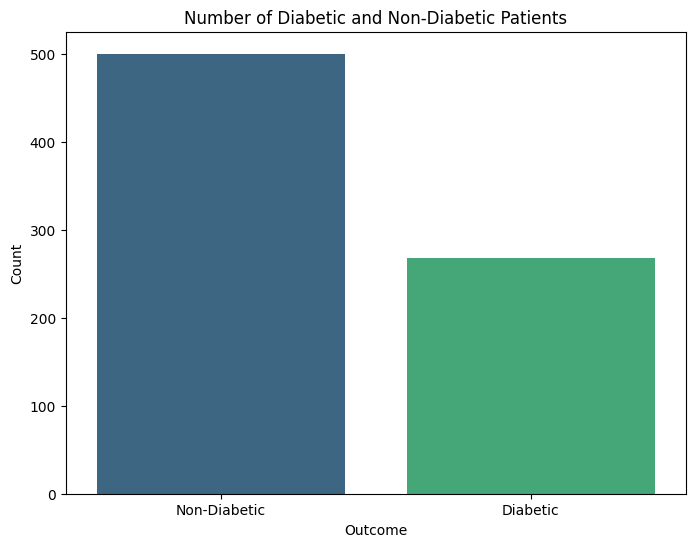

In [31]:
# Identify the number of diabetic and non-diabetic patients
outcome_counts = data['Outcome'].value_counts()
print(outcome_counts)

# Plot a bar graph for the number of diabetic and non-diabetic patients
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Number of Diabetic and Non-Diabetic Patients')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()


**Plot the relationship between Age and Outcome using a scatter plot**

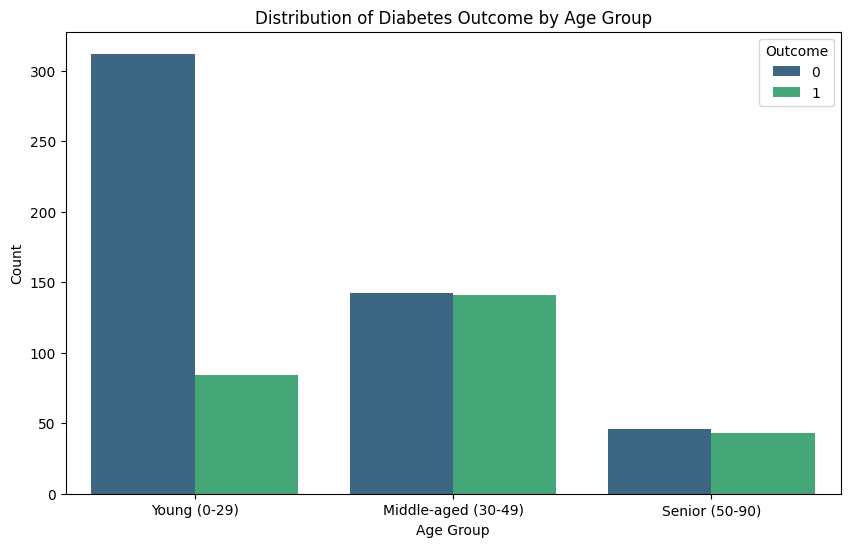

In [44]:
# Define age groups
bins = [0, 30, 50, np.inf]
labels = ['Young (0-29)', 'Middle-aged (30-49)', 'Senior (50-90)']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Plot a bar graph for AgeGroup by Outcome
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Outcome', data=data, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome by Age Group')
plt.show()

In [45]:
# Remove the 'AgeGroup' column
data = data.drop(columns=['AgeGroup'])

Interpretation of the Graph
The graph illustrates the distribution of diabetes outcomes across different age groups. The age groups are categorized as Young (0-29 years), Middle-aged (30-49 years), and Senior (50+ years). The Outcome variable is binary, where 0 represents non-diabetic and 1 represents diabetic individuals. Here's how to interpret the graph:

Young Age Group:

There is a significantly higher number of non-diabetic individuals compared to diabetic individuals in this age group.
The count of non-diabetic individuals is over 300, while the count of diabetic individuals is much lower, indicating that younger individuals are less likely to be diabetic.
Middle-aged Group:

The numbers of non-diabetic and diabetic individuals are almost equal in this age group.
This suggests that the risk of diabetes increases in middle-aged individuals, resulting in a more balanced distribution between non-diabetic and diabetic individuals.
Senior Age Group:

The numbers of non-diabetic and diabetic individuals are relatively low compared to the other age groups, but they are quite balanced.
The counts for both non-diabetic and diabetic individuals are almost the same, indicating that in the senior age group, the likelihood of being diabetic is higher compared to the younger age group.
Summary:
Young Individuals (0-29 years): Predominantly non-diabetic.
Middle-aged Individuals (30-49 years): Similar numbers of diabetic and non-diabetic individuals, indicating an increased risk of diabetes.
Senior Individuals (50+ years): Although fewer in number, the distribution is balanced, suggesting a higher relative risk of diabetes.
This graph highlights the importance of age as a factor in diabetes prevalence, with the risk of diabetes increasing with age, especially noticeable in the middle-aged and senior groups.

<ipython-input-17-f18364ad31b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette='viridis')


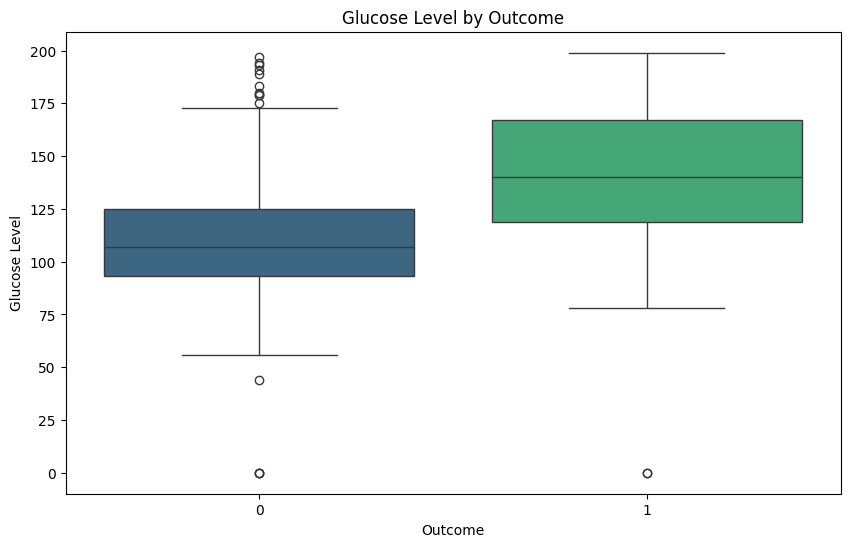

<ipython-input-17-f18364ad31b2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=data, palette='viridis')


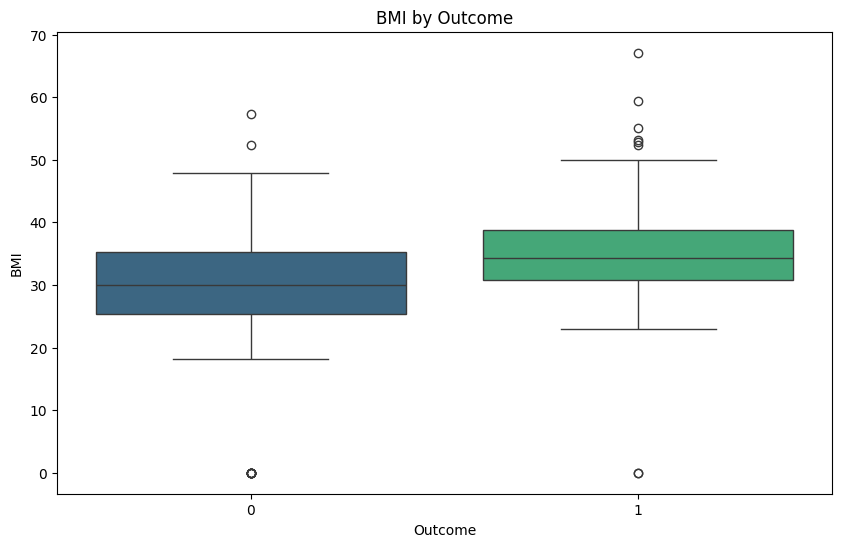

In [17]:
# Visualization of variables with strong correlations
# Glucose and Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Glucose Level')
plt.title('Glucose Level by Outcome')
plt.show()

# BMI and Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=data, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.title('BMI by Outcome')
plt.show()


<ipython-input-18-4cfafef264bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BloodPressure', data=data, palette='viridis')


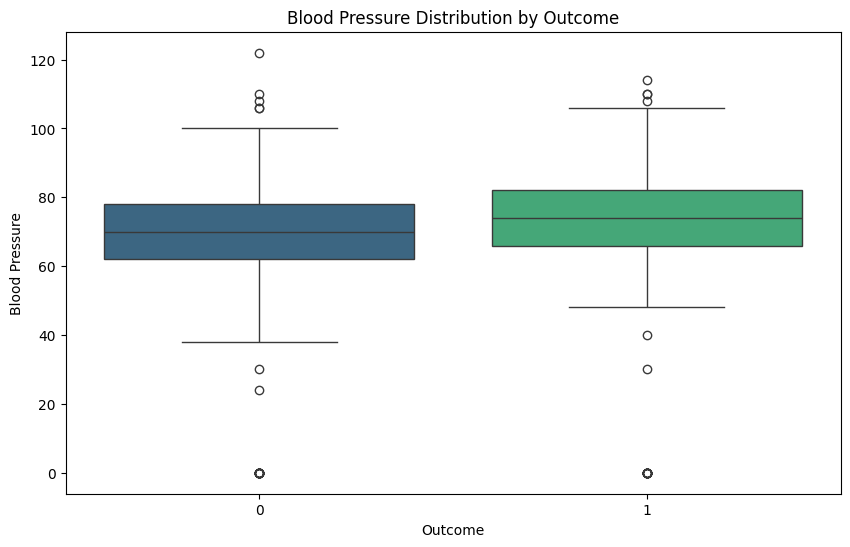

In [18]:
# Relationship between Blood Pressure and Outcome using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BloodPressure', data=data, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure Distribution by Outcome')
plt.show()

<ipython-input-20-4f8623333633>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Insulin', data=data, palette='viridis')


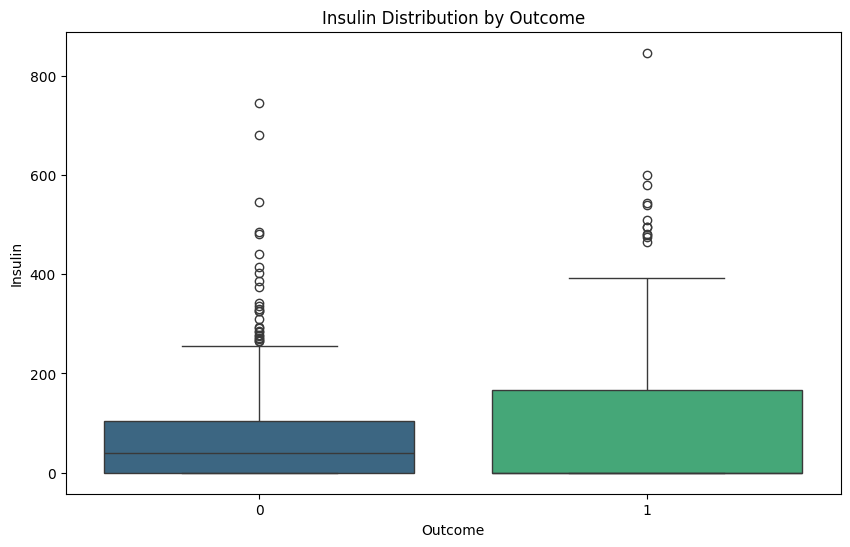

In [20]:
# Relationship between Insulin and Outcome using a violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=data, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.title('Insulin Distribution by Outcome')
plt.show()

In [53]:
# Check for null values
print("Null values before handling:")
print(data.isnull().sum())

Null values before handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
# Handle missing values by filling with the mean (excluding 'Outcome' column)
columns = data.columns.tolist()
columns.remove('Outcome')

for column in columns:
    if data[column].dtype in ['int64', 'float64']:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)
        print(f"Filled missing values in column '{column}' with mean value: {mean_value}")

# Verify that there are no more missing values in the feature columns
print("\nNull values after handling:")
print(data.isnull().sum())



Filled missing values in column 'Pregnancies' with mean value: 3.8450520833333335
Filled missing values in column 'Glucose' with mean value: 120.89453125
Filled missing values in column 'BloodPressure' with mean value: 69.10546875
Filled missing values in column 'SkinThickness' with mean value: 20.536458333333332
Filled missing values in column 'Insulin' with mean value: 79.79947916666667
Filled missing values in column 'BMI' with mean value: 31.992578124999998
Filled missing values in column 'DiabetesPedigreeFunction' with mean value: 0.47187630208333325
Filled missing values in column 'Age' with mean value: 33.240885416666664

Null values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
data.to_csv('diabetes_cleaned.csv', index=False)
print("Data saved to 'diabetes_cleaned.csv'")

Data saved to 'diabetes_cleaned.csv'


In [5]:
# Features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']


# Standardization
scaler = StandardScaler()                                                  # initializing the standard scaler
X_scaled = scaler.fit_transform(X)                                         # scaling the features

# Handling class imbalance using SMOTE
smote = SMOTE()                                                            # initializing SMOTE
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)                 # applying SMOTE to balance the classes

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)  # splitting the data

# Model building and evaluation




In [6]:
# Initialize an empty list to store the evaluation results
results = []

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_cm = confusion_matrix(y_test, y_pred_log_reg)
log_reg_cr = classification_report(y_test, y_pred_log_reg, output_dict=True)
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': log_reg_acc,
    'Confusion Matrix': log_reg_cm,
    'Classification Report': log_reg_cr
})

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
dec_tree_acc = accuracy_score(y_test, y_pred_dec_tree)
dec_tree_cm = confusion_matrix(y_test, y_pred_dec_tree)
dec_tree_cr = classification_report(y_test, y_pred_dec_tree, output_dict=True)
results.append({
    'Model': 'Decision Tree',
    'Accuracy': dec_tree_acc,
    'Confusion Matrix': dec_tree_cm,
    'Classification Report': dec_tree_cr
})

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_cr = classification_report(y_test, y_pred_svm, output_dict=True)
results.append({
    'Model': 'Support Vector Machine',
    'Accuracy': svm_acc,
    'Confusion Matrix': svm_cm,
    'Classification Report': svm_cr
})

# Additional Models
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_cr = classification_report(y_test, y_pred_rf, output_dict=True)
results.append({
    'Model': 'Random Forest',
    'Accuracy': rf_acc,
    'Confusion Matrix': rf_cm,
    'Classification Report': rf_cr
})

# LightGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
lgbm_acc = accuracy_score(y_test, y_pred_lgbm)
lgbm_cm = confusion_matrix(y_test, y_pred_lgbm)
lgbm_cr = classification_report(y_test, y_pred_lgbm, output_dict=True)
results.append({
    'Model': 'LightGBM',
    'Accuracy': lgbm_acc,
    'Confusion Matrix': lgbm_cm,
    'Classification Report': lgbm_cr
})

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)
knn_cr = classification_report(y_test, y_pred_knn, output_dict=True)
results.append({
    'Model': 'K-Nearest Neighbors',
    'Accuracy': knn_acc,
    'Confusion Matrix': knn_cm,
    'Classification Report': knn_cr
})

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred_gnb)
gnb_cm = confusion_matrix(y_test, y_pred_gnb)
gnb_cr = classification_report(y_test, y_pred_gnb, output_dict=True)
results.append({
    'Model': 'Gaussian Naive Bayes',
    'Accuracy': gnb_acc,
    'Confusion Matrix': gnb_cm,
    'Classification Report': gnb_cr
})

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('model_evaluation_results.csv', index=False)

# Display the DataFrame
print(results_df)

[LightGBM] [Info] Number of positive: 399, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1130
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [9]:
import pickle

# Our best model Random Forest model and it is stored in the variable `rf`
# Train Random Forest model (example)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Save the Random Forest model to a file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf, file)

# Print confirmation
print("Random Forest model trained and saved successfully!")


Random Forest model trained and saved successfully!


In [10]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00


In [11]:
pip install streamlit scikit-learn numpy

In [12]:
# Save the provided Streamlit app code to app.py
app_code = """
import streamlit as st
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the trained model
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'rb') as file:
    model = pickle.load(file)

# Load the scaler
scaler = StandardScaler()
X_sample = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Sample data for fitting the scaler
scaler.fit(X_sample)

# Main application
st.title("Diabetes Prediction")
st.write("Enter the following health metrics to predict the likelihood of diabetes:")

# Input fields for user to enter health metrics
pregnancies = st.number_input("Pregnancies:", min_value=0)
glucose = st.number_input("Glucose Level:", min_value=0)
blood_pressure = st.number_input("Blood Pressure:", min_value=0)
skin_thickness = st.number_input("Skin Thickness:", min_value=0)
insulin = st.number_input("Insulin Level:", min_value=0)
bmi = st.number_input("BMI:", min_value=0.0)
diabetes_pedigree = st.number_input("Diabetes Pedigree Function:", min_value=0.0)
age = st.number_input("Age:", min_value=0)

input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]])
input_data_scaled = scaler.transform(input_data)

if st.button("Predict"):
    prediction = model.predict(input_data_scaled)
    if prediction[0] == 0:
        st.write("The person is not diabetic.")
    else:
        st.write("The person is diabetic.")
"""

with open('app.py', 'w') as file:
    file.write(app_code)

print("app.py has been saved successfully.")

app.py has been saved successfully.


In [13]:
!pip install streamlit scikit-learn numpy pyngrok

In [14]:
!ngrok authtoken 2gqf851cg5AEXHC6GSBjaFrxXZP_69bivNyNDAx95qq7xmNHZ


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [21]:
from pyngrok import ngrok

# Start ngrok and create a public URL for the Streamlit app
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at {public_url}")

# Run the Streamlit app in the background
!streamlit run app.py &


Streamlit app is live at NgrokTunnel: "https://2f80-34-80-190-218.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.190.218:8501



  Stopping...


 Random Forest model was identified as the best-performing model, achieving the highest accuracy among the tested algorithms. This approach ensures a systematic process for handling data, addressing class imbalance, and evaluating multiple models to select the most effective one. To deploy model using Streamlit, we'll create a web application that allows users to input data, make predictions using the trained Random Forest model, and display the results. Prepare our Streamlit app (app.py).
Ensure dependencies are listed in requirements.txt.
Test our app locally using Streamlit.
Push our code to a GitHub repository.
Deploy using Streamlit Sharing/deployment platform.
By following these steps, we can create a user-friendly web application that leverages our trained machine learning model to predict diabetes and make it accessible online.